# Assignment 2

Index No - 190660F

Name - Wanigarathna A.D.

1)


In [1]:
import numpy as np 
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import sympy as sym
from math import sqrt
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0 ,2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

In [2]:

def getACircle(X):  # This Code generates a circle using randoml selected 3 points

    indices = np.random.randint(0,len(X),size = 3)
    while indices[0] == indices[1] or indices[1] == indices[2] or indices[0] == indices[2]:
        indices = np.random.randint(0,len(X),size = 3)
    x1 = X[indices[0],0]
    x2 = X[indices[1],0]
    y1 = X[indices[0],1]
    x3 = X[indices[2],0]
    y2 = X[indices[1],1] 
    y3 = X[indices[2],1]



    x12 = x1 - x2
    x13 = x1 - x3
 
    y12 = y1 - y2
    y13 = y1 - y3
 
    y31 = y3 - y1
    y21 = y2 - y1
 
    x31 = x3 - x1
    x21 = x2 - x1
 
    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2)
 
    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2)
 
    sx21 = pow(x2, 2) - pow(x1, 2)
    sy21 = pow(y2, 2) - pow(y1, 2)

  
    f = (((sx13) * (x12) + (sy13) *
        (x12) + (sx21) * (x13) +
        (sy21) * (x13)) / (2 *
        ((y31) * (x12) - (y21) * (x13))))
            
    g = (((sx13) * (y12) + (sy13) * (y12) +
        (sx21) * (y13) + (sy21) * (y13)) /
        (2 * ((x31) * (y12) - (x21) * (y13))))
 
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1)
 
 
    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c
    h = round(h,5)
    k = round(k,5)
    r = round(sqrt(sqr_of_r), 5)

    return h,k,r,indices




In [3]:
def getPoints(h,k,r,X,indices,threshold): # This function calculates inliers for a given circle
    xlist = []
    ylist = []
    error = 0
    inlierCount = 0
    rqdInlierCount = 40

    for ind in range(len(X)):
        x =  X[ind,0]
        y = X[ind,1]
        distance = round(abs(r - sqrt((x-h)**2 + (y-k)**2)),5)
        if distance <= threshold:
           error += distance
           inlierCount += 1 
           xlist.append(x)
           ylist.append(y)

    rf = np.corrcoef(xlist, ylist) 
    if inlierCount >= rqdInlierCount and abs(rf[0][1]) < 0.95: # checking whether there are sufficient inlier points 
        meanAbsoluteError = round(error/inlierCount,5)# and those inliers not belong to a line
        return (h ,k ,r, inlierCount, meanAbsoluteError,indices)
       

       


In [4]:
def getInliersAndOutliers(X,h,k,r,threshold): # This function  differentiate inliers and outliers and returns indices lists. This is done only for the selected circle
    ind_inliers = []
    ind_outliers = []
    for i in range(len(X)):
        distance = round(abs(r - sqrt((X[i][0]-h)**2 + (X[i][1]-k)**2)),5)
        if distance <= threshold:
            ind_inliers.append(i)
        else:
            ind_outliers.append(i)
    return ind_inliers,ind_outliers

In [5]:
def RANSAC(X,threshold,N):
    maxIterations = N  # N 
    matchedCircles = []
    matchedCircles_2 = []
    for ind in range(maxIterations):
        h,k,r,indices = getACircle(X)
        result = getPoints(h,k,r,X,indices,threshold)
        if result:
            matchedCircles.append(result)
    matchedCircles.sort(reverse= True, key = lambda x: x[3])
    for i in range (len(matchedCircles)):
        if matchedCircles[i][3] == matchedCircles[0][3]:
            matchedCircles_2.append(matchedCircles[i])

    bestFit = min(matchedCircles_2,key = lambda x:x[4])
    ind_inliers,ind_outliers = getInliersAndOutliers(X,bestFit[0],bestFit[1],bestFit[2],threshold)
    return ind_inliers,ind_outliers,bestFit

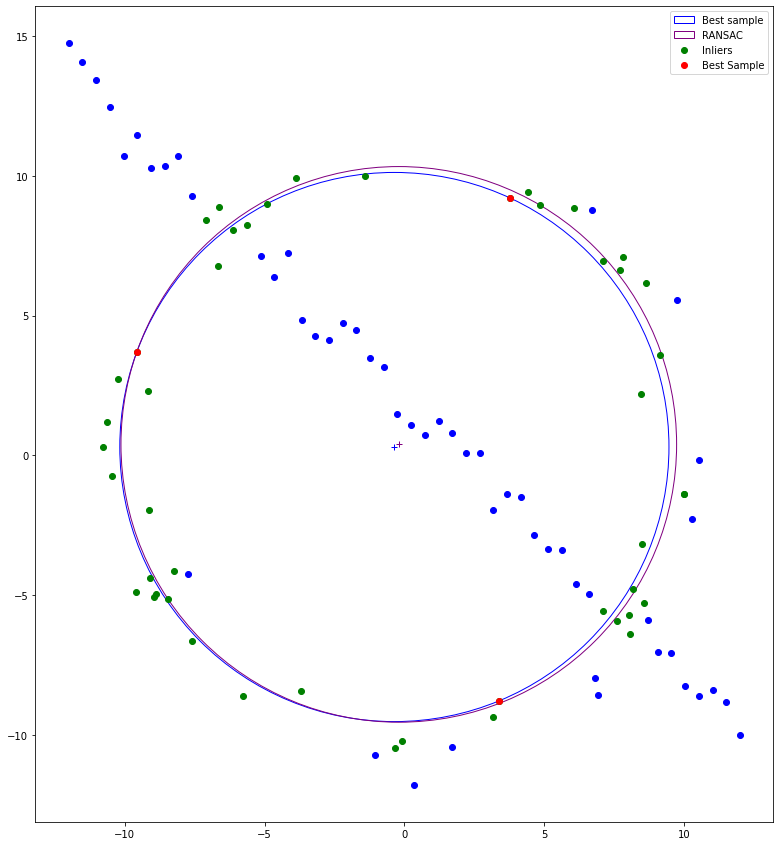

In [6]:
ind_inliers,ind_outliers,bestFit  = RANSAC(X,1,100) # getting best fit circle
inliers = [X[i] for i in range (len(X)) if i in ind_inliers]
inliers = np.array(inliers)
ind_inliers_1,ind_outliers_1,bestFit_1  = RANSAC(inliers,0.9,70) # getting RANSAC circle by using RANSAC for inliers
figure, axes = plt.subplots(1,1,figsize = (15,15))
draw_circle = plt.Circle((bestFit[0],bestFit[1]),bestFit[2], fill = False,color = 'blue',label = 'Best sample' )
draw_circle_1 = plt.Circle((bestFit_1[0],bestFit_1[1]),bestFit_1[2], fill = False,color = 'purple' , label = 'RANSAC')
axes.add_artist(draw_circle)
axes.add_artist(draw_circle_1)
axes.set_aspect(1)

plt.plot(X[ind_inliers,0],X[ind_inliers,1], 'o', color='green',label = "Inliers")
plt.plot(X[bestFit[-1],0],X[bestFit[-1],1], 'o', color='red', label = "Best Sample")
plt.plot(bestFit[0],bestFit[1], '+', color='blue')
plt.plot(bestFit_1[0],bestFit_1[1], '+', color='purple')
plt.plot(X[ind_outliers,0],X[ind_outliers,1], 'o', color='blue')
plt.legend(handles=[draw_circle,draw_circle_1],labels=['Best sample','RANSAC'])
plt.legend()
plt.show()

2)


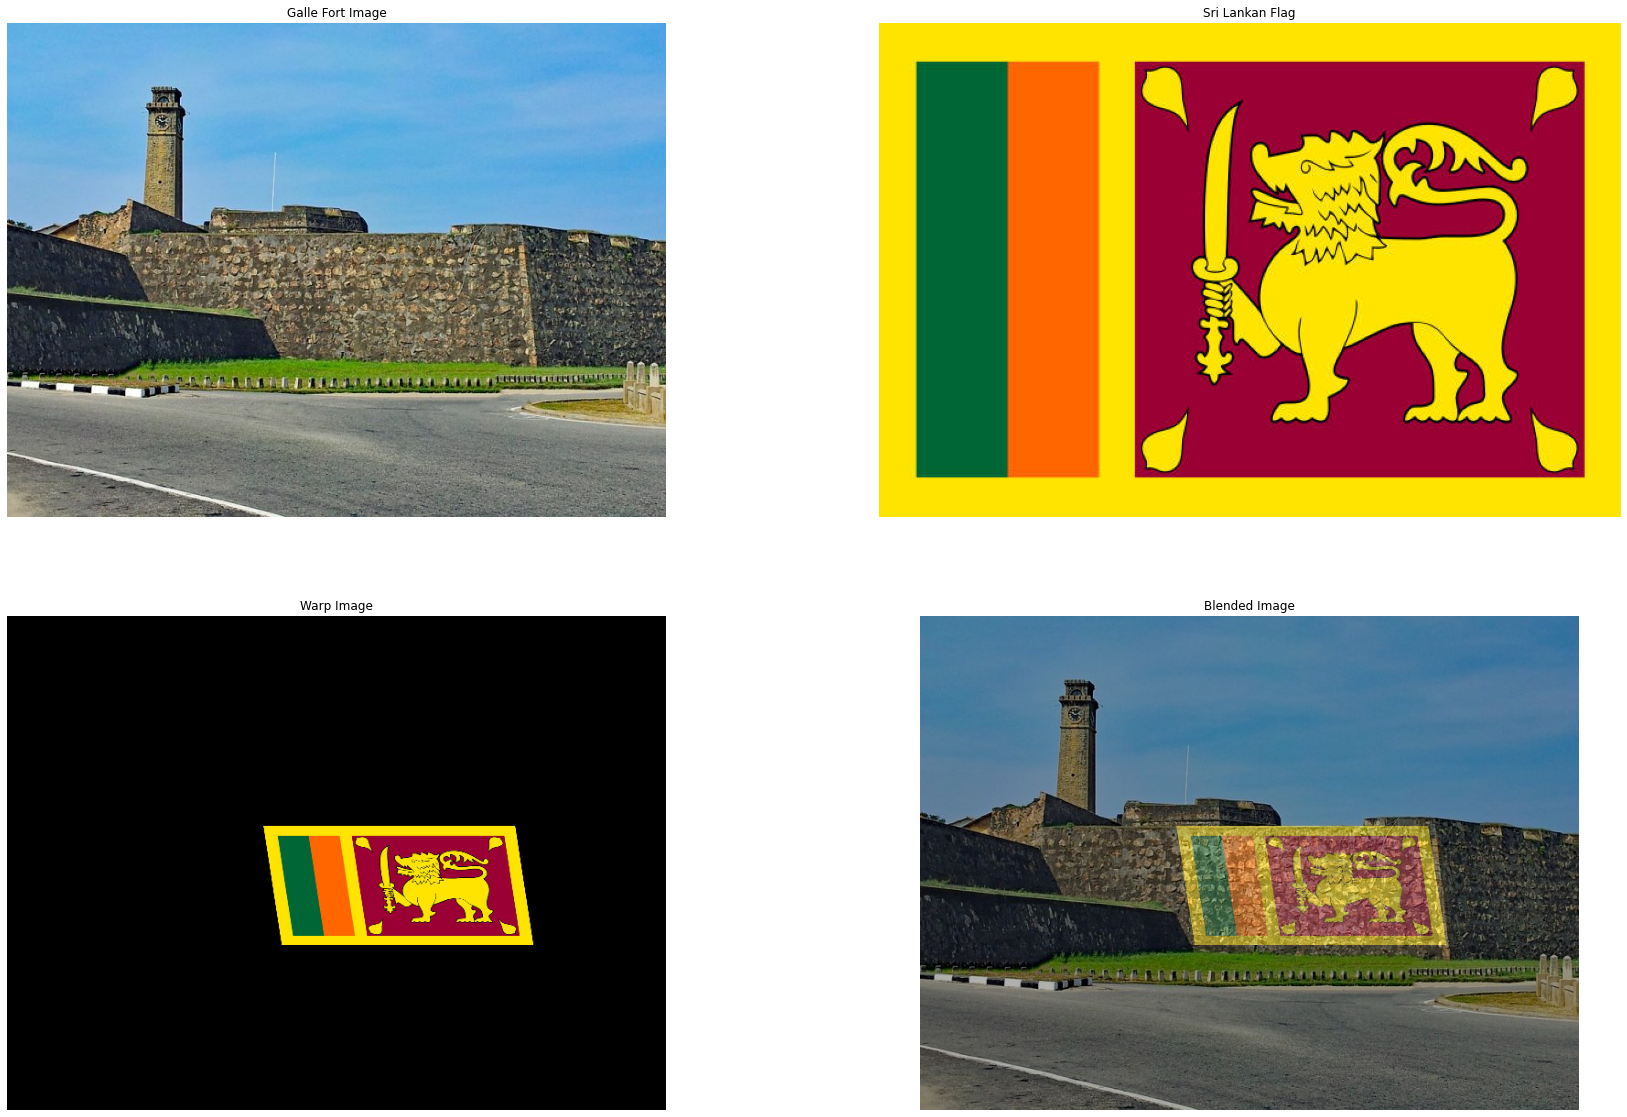

In [7]:
import numpy as np
import matplotlib . pyplot as plt
import cv2 as cv

galleFortImage = plt.imread('gallefort.jpg')
srilankanFlag = plt.imread('srilankanflag.jpg')

pts_dist = np.array([[300,360],[280,230],[555,230],[575,360]]) # Calculated image pixel points to place the flag
pts_src = np.array([[0,408],[0,0],[612,0],[612,408]])# Edge pixel points of the flag

h,status = cv.findHomography(pts_src,pts_dist) # Calculating homography 

im_out = cv.warpPerspective(srilankanFlag,h,(galleFortImage.shape[1],galleFortImage.shape[0]))
result = cv.addWeighted(im_out, 0.4, galleFortImage, 0.7, 0.0)

fig, ax = plt.subplots(2,2, figsize = (30,20))
ax[0][0].imshow(galleFortImage)
ax[0][0].set_title("Galle Fort Image")
ax[0][0].axis('off') 
ax[0][1].imshow(srilankanFlag)
ax[0][1].set_title("Sri Lankan Flag")
ax[0][1].axis('off') 
ax[1][0].imshow(im_out)
ax[1][0].set_title("Warp Image")
ax[1][0].axis('off')
ax[1][1].imshow(result)
ax[1][1].set_title("Blended Image")
ax[1][1].axis('off')
plt.show()  



3)


a)

(-0.5, 1599.5, 639.5, -0.5)

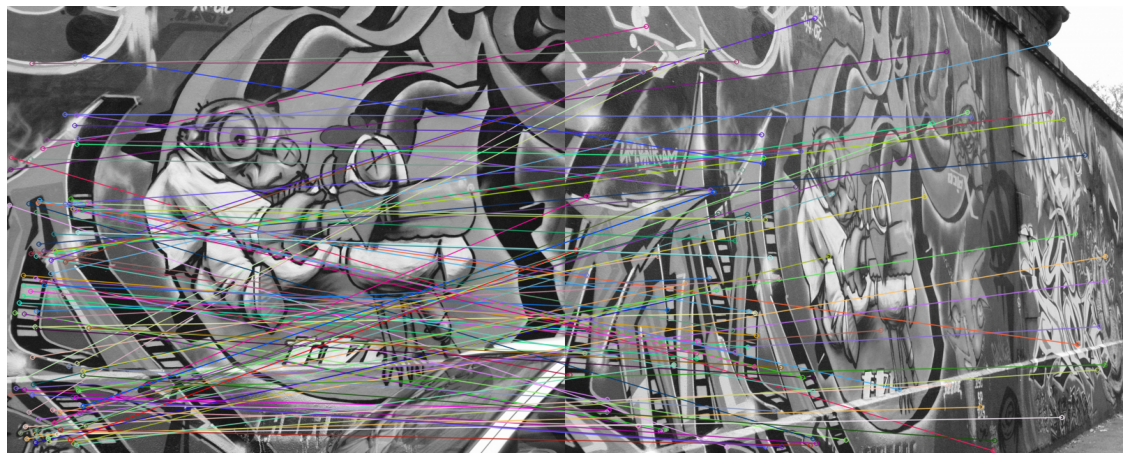

In [8]:

import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
img1 = cv.imread('img1.ppm')
img5 = cv.imread('img5.ppm') 
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)

figure, ax = plt.subplots(1, 1, figsize=(20,20))

img3 = cv.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:100], img5, flags=2)
ax.imshow(img3)
ax.axis('off')

b)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random


def geometricDistance(correspondence, h):# Calculating geometric distance
    
    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)

def calculateHomography(correspondences):# calculating homographies between give point sets
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)
    u, s, v = np.linalg.svd(matrixA)
    h = np.reshape(v[8], (3, 3))
    h = (1/h.item(8)) * h
    return h


def ransac(corr, thresh): # This function finds homography within RANSAC
    maxInliers = []
    finalH = None
    for i in range(1500):
       
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))

        h = calculateHomography(randomFour)
        inliers = []
        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
            
        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers



In [10]:
img1 = cv.imread('img1.ppm',cv.IMREAD_COLOR)
img2 = cv.imread('img2.ppm',cv.IMREAD_COLOR) 
img3 = cv.imread('img3.ppm',cv.IMREAD_COLOR)
img4 = cv.imread('img4.ppm',cv.IMREAD_COLOR) 
img5 = cv.imread('img5.ppm',cv.IMREAD_COLOR) 


img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(img3,None)
keypoints_4, descriptors_4 = sift.detectAndCompute(img4,None)
keypoints_5, descriptors_5 = sift.detectAndCompute(img5,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches_1 = bf.match(descriptors_1,descriptors_2)
matches_2 = bf.match(descriptors_2,descriptors_3)
matches_3 = bf.match(descriptors_3,descriptors_4)
matches_4 = bf.match(descriptors_4,descriptors_5)


tempList1 = []
tempList2 = []
tempList3 = []
tempList4 = []

for match in matches_1:
    (x1, y1) = keypoints_1[match.queryIdx].pt
    (x2, y2) = keypoints_2[match.trainIdx].pt
    tempList1.append([x1, y1, x2, y2])

for match in matches_2:
    (x3, y3) = keypoints_2[match.queryIdx].pt
    (x4, y4) = keypoints_3[match.trainIdx].pt
    tempList2.append([x3, y3, x4, y4])

for match in matches_3:
    (x5, y5) = keypoints_3[match.queryIdx].pt
    (x6, y6) = keypoints_4[match.trainIdx].pt
    tempList3.append([x5, y5, x6, y6])

for match in matches_4:
    (x7, y7) = keypoints_4[match.queryIdx].pt
    (x8, y8) = keypoints_5[match.trainIdx].pt
    tempList4.append([x7, y7, x8, y8])

pointList1 = np.matrix(tempList1)
pointList2 = np.matrix(tempList2)
pointList3 = np.matrix(tempList3)
pointList4 = np.matrix(tempList4)

finalH1, inliers1 = ransac(pointList1, 0.6)
finalH2, inliers2 = ransac(pointList2, 0.6)
finalH3, inliers3 = ransac(pointList3, 0.6)
finalH4, inliers4 = ransac(pointList4, 0.6)

finalHomography = np.matmul(finalH4,np.matmul(finalH3,np.matmul(finalH2, finalH1))) # calculating final homography matrix

print(finalHomography)

[[ 6.06577006e-01  3.16987206e-02  2.23467210e+02]
 [ 2.19386530e-01  1.09374820e+00 -1.48366835e+01]
 [ 4.82422804e-04 -1.29094682e-04  9.99318304e-01]]


c)

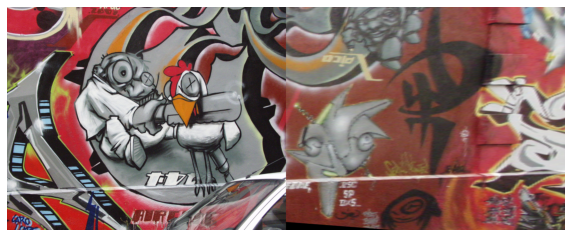

In [11]:
dst = cv.warpPerspective(img5, np.linalg.inv(finalHomography), ((img5.shape[1] + img1.shape[1]), img1.shape[0]))
dst[0:img1.shape[0], 0:img1.shape[1]] = img1
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(dst)
ax.axis('off')
plt.show()